In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
df = pd.read_csv("C:/Users/hp/Downloads/tips (data for regression problem).csv")

In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [7]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [11]:

    le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])      # Encodes 'Male' and 'Female' as 0 and 1
df['smoker'] = le.fit_transform(df['smoker']) # Encodes 'Yes' and 'No' as 0 and 1
df['time'] = le.fit_transform(df['time'])     # Encodes 'Lunch' and 'Dinner' as 0 and 1

# One-Hot Encoding for 'day' (since it has more than 2 unique values)
df= pd.get_dummies(df, columns=['day'], drop_first=True)  # Drops the first category to avoid multicollinearity

# Standardize numerical features (total_bill and size)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['total_bill', 'size']] = scaler.fit_transform(df[['total_bill','size']])
    

In [9]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [13]:
from sklearn.model_selection import train_test_split

 
X = df.drop('tip', axis=1)  
y = df['tip']              


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (195, 8)
Test set size: (49, 8)


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

 
X = df.drop('tip', axis=1)  
y = df['tip']  

 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


y_pred = linear_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression - MAE: {mae:.2f}, R²: {r2:.2f}")

Linear Regression - MAE: 0.67, R²: 0.44


In [15]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)


y_pred = ridge_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Ridge Regression - MAE: {mae:.2f}, R²: {r2:.2f}")

Ridge Regression - MAE: 0.67, R²: 0.44


In [17]:
from sklearn.linear_model import Lasso


lasso_model = Lasso(alpha=0.1)  
lasso_model.fit(X_train, y_train)

#
y_pred = lasso_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Lasso Regression - MAE: {mae:.2f}, R²: {r2:.2f}")

Lasso Regression - MAE: 0.65, R²: 0.51


In [18]:
from sklearn.tree import DecisionTreeRegressor

 
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

 
y_pred = tree_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Decision Tree Regression - MAE: {mae:.2f}, R²: {r2:.2f}")


Decision Tree Regression - MAE: 0.83, R²: -0.00


In [19]:
from sklearn.ensemble import RandomForestRegressor

 
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

 
y_pred = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Regression - MAE: {mae:.2f}, R²: {r2:.2f}")


Random Forest Regression - MAE: 0.76, R²: 0.26


In [20]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

 
svr_model = SVR(kernel='rbf')  
svr_model.fit(X_train_scaled, y_train)

 
y_pred = svr_model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"SVR - MAE: {mae:.2f}, R²: {r2:.2f}")


SVR - MAE: 0.68, R²: 0.38


In [21]:
from sklearn.neighbors import KNeighborsRegressor

 
knn_model = KNeighborsRegressor(n_neighbors=5) 
knn_model.fit(X_train, y_train)

 
y_pred = knn_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"KNN Regression - MAE: {mae:.2f}, R²: {r2:.2f}")



KNN Regression - MAE: 0.72, R²: 0.33


Optimize Staffing: Increase staff during peak tip periods (e.g., weekends, dinner time).

Staff Training: Train employees to improve service, boosting tips.

Target High-Tip Customers: Offer promotions to customers who tend to tip more.

Menu Strategy: Upsell premium items to increase bill size and tips.

Monitor Tip Distribution: Learn from top performers and incentivize staff.

Address Low Tips: Investigate and improve service during low-tip periods.

Customer Satisfaction: Improve service based on feedback to increase tips.

Use Promotions: Offer time-limited deals to boost tips during slow periods.

Seasonal Trends: Adjust staffing and promotions based on tip fluctuations in different seasons.

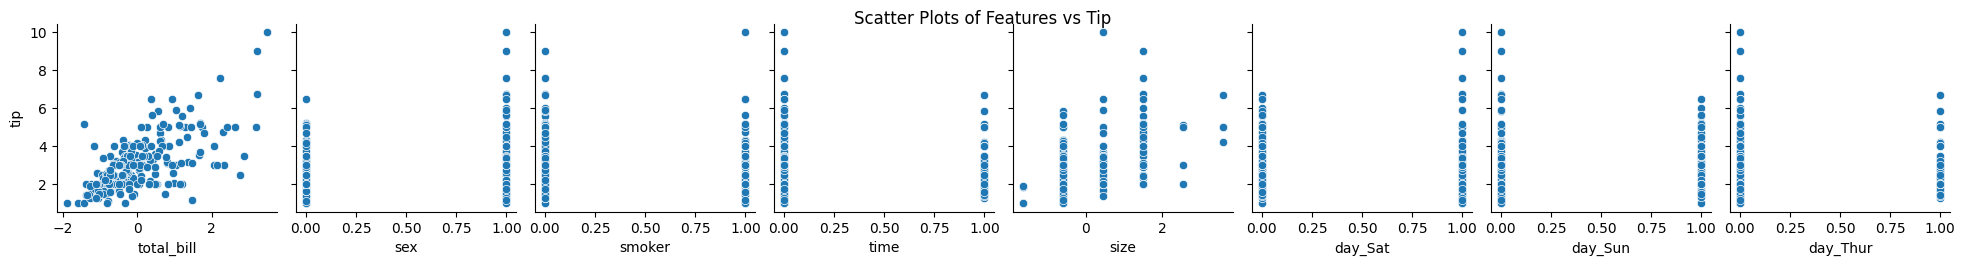

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

 
sns.pairplot(df, x_vars=df.columns.drop('tip'), y_vars=['tip'])
plt.suptitle('Scatter Plots of Features vs Tip', y=1.02)
plt.show()


Linear Relationship: Data forms a straight line.

Use: Linear Regression.
Non-linear Relationship: Data shows a curved or complex pattern.

Use: Random Forest, SVR.
No Clear Trend: Data is scattered randomly.

Action: Feature selection needed.
Outliers: Points far from the main cluster.

Action: Handle outliers (remove or transform).
Homoscedasticity: Consistent spread of points.

Use: Linear Regression.
Clusters: Points group into subgroups.

Action: Consider clustering techniques or additional features

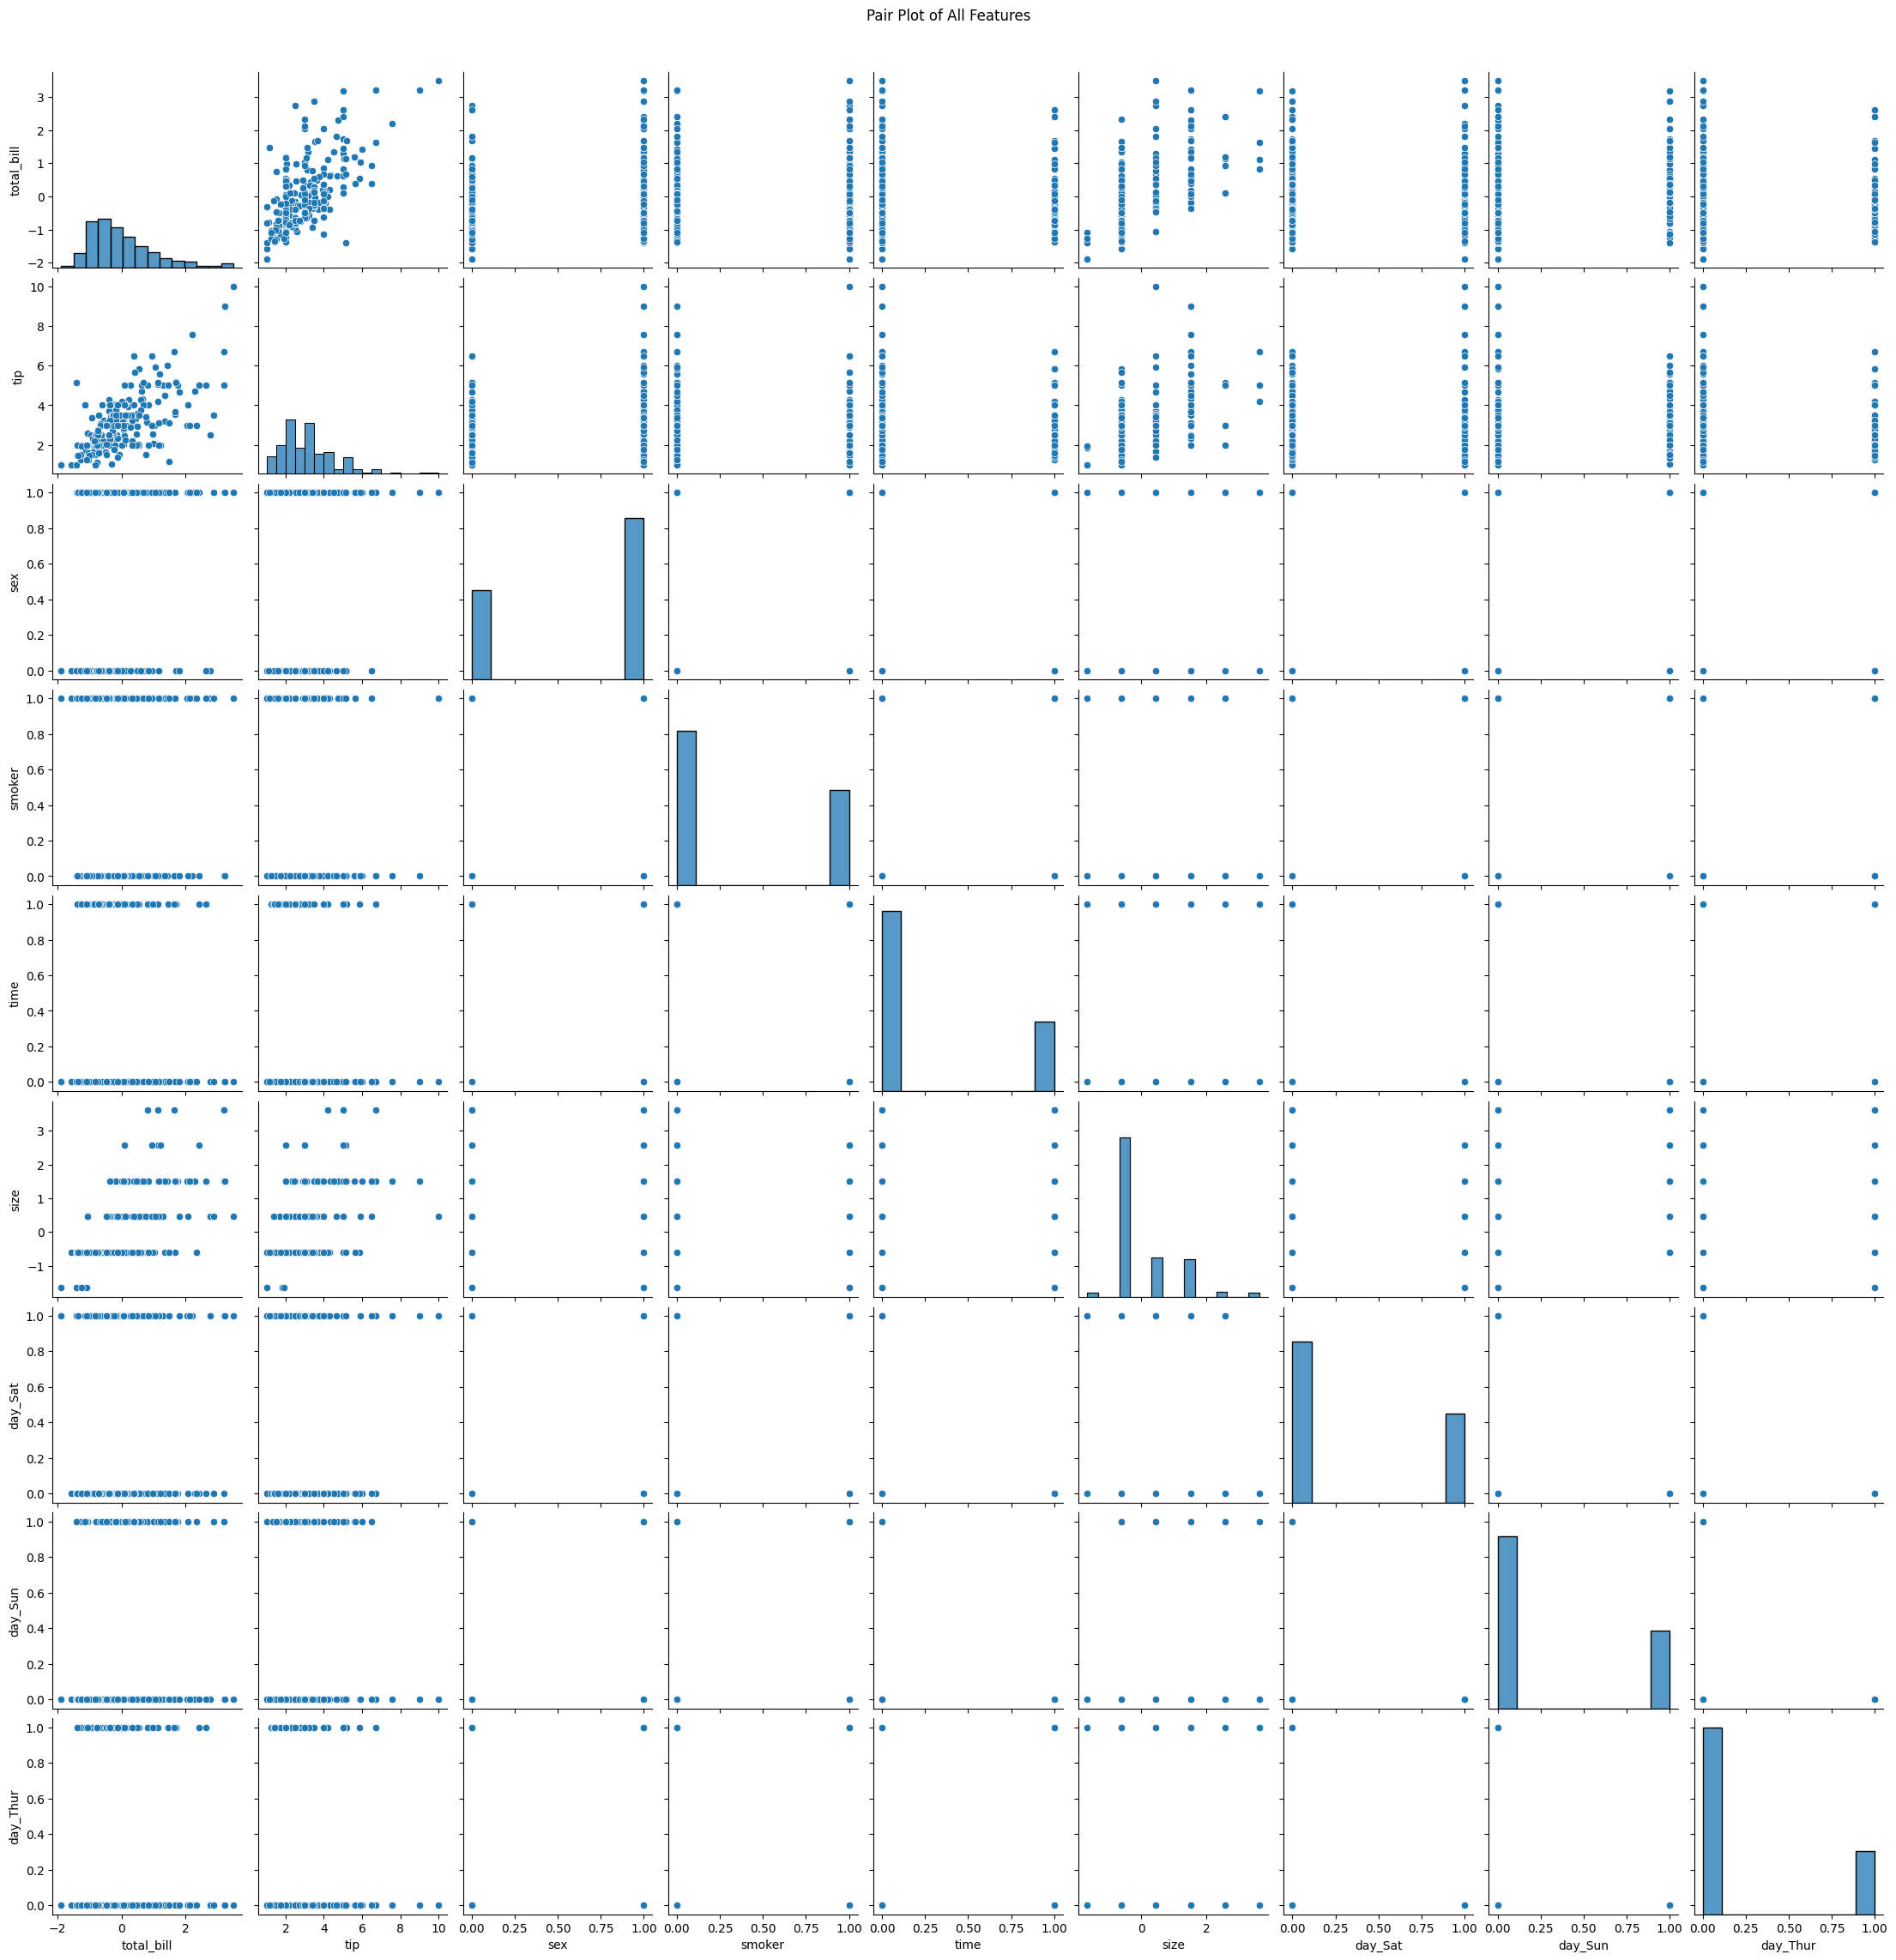

In [26]:
 
sns.pairplot(df)   
plt.suptitle('Pair Plot of All Features', y=1.02)
plt.show()


Linear Relationship: Straight-line pattern.

Action: Use Linear Regression.
Non-linear Relationship: Curved pattern.

Action: Use Random Forest, SVR.
Strong Correlation: Points closely follow a line.

Action: Features are useful.
Weak/No Correlation: No clear pattern.

Action: Remove or rethink features.
Outliers: Distant points.

Action: Handle outliers.
Feature Distribution: Diagonal plots.

Action: Check normality.
Complex Interactions: Multiple feature interactions.

Action: Use Ensemble Methods

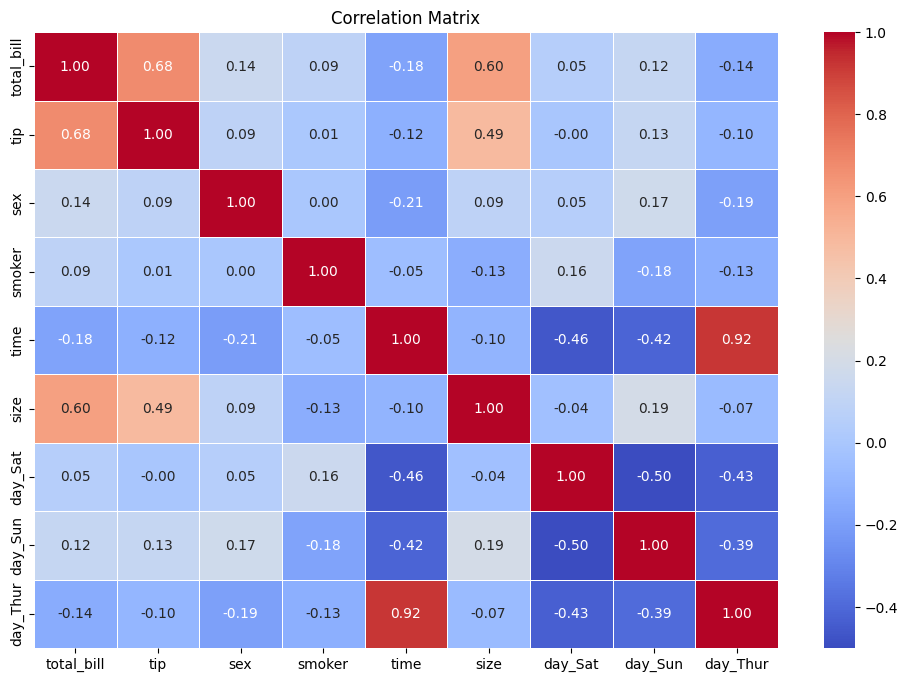

In [27]:

correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


Strong Positive Correlation: Values near +1.

Action: Features move together, useful for prediction.
Strong Negative Correlation: Values near -1.

Action: Features move oppositely, useful but inverse.
No Correlation: Values near 0.

Action: Remove irrelevant features.
Multicollinearity: High correlation between predictors.

Action: Remove or combine features.
Target Correlation: Correlation with target (tip).

Action: Features highly correlated with target are useful.
Weak Correlation: Low correlation values.

Action: Consider removing or transforming features.
Redundant Features: High correlation between predictors.

Action: Remove redundant features.

In [34]:



from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow

model = ols('tip ~ total_bill + size + sex + smoker + time + day_Sat + day_Sun + day_Thur', data=df).fit()

stat, p_value = linear_rainbow(model)

print(f"Rainbow Test Statistic: {stat:.3f}")
print(f"Rainbow Test p-value: {p_value:.3f}")

if p_value < 0.05:
    print("The p-value is low, suggesting that a linear model may not be a good fit.")
else:
    print("The p-value is high, suggesting that a linear model may be appropriate.")

 



Rainbow Test Statistic: 1.197
Rainbow Test p-value: 0.166
The p-value is high, suggesting that a linear model may be appropriate.


Purpose:

Tests if the relationship between the independent variables and the dependent variable is linear.
Null Hypothesis (H0):

The relationship is linear.
Alternative Hypothesis (H1):

The relationship is non-linear.
p-value Interpretation:

p-value < 0.05: Reject the null hypothesis, suggesting the relationship is non-linear. A non-linear model may be more appropriate.
p-value > 0.05: Fail to reject the null hypothesis, suggesting the relationship is linear. The linear regression model is a valid fit.
Conclusion:

Small p-value (< 0.05): Non-linear model might be needed.
Large p-value (> 0.05): Linear model is appropriate

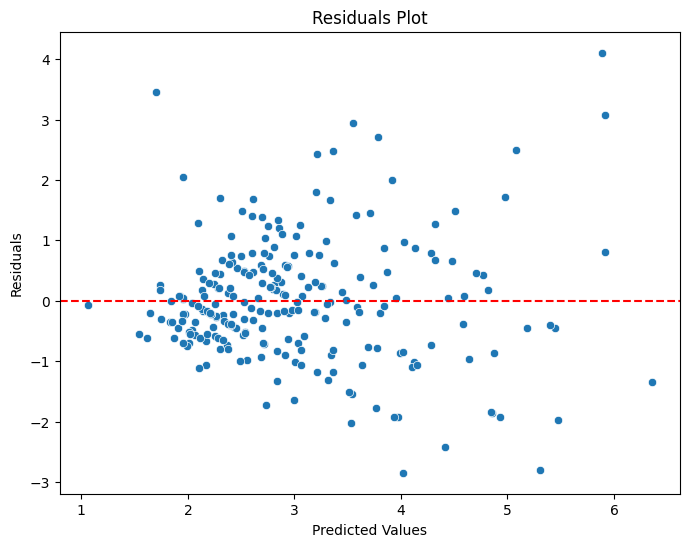

In [35]:

y_pred = model.predict(X)
residuals = y - y_pre
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()


Random Distribution:

Residuals randomly scattered around zero → Good fit for the model.
Non-random Patterns:

Patterns or curves in residuals → Indicates non-linear relationship not captured by the model.
Heteroscedasticity:

Increasing/decreasing spread of residuals → Indicates non-constant variance (variance not the same across all levels of prediction).
Action: Try transforming variables or using weighted regression.
Normality of Residuals:

Residuals are normally distributed → Assumes normal error terms (important for hypothesis testing in linear regression).
Action: Check normality with statistical tests like Shapiro-Wilk.
Outliers:

Large residuals → Indicates outliers that are poorly predicted.
Action: Investigate outliers to ensure they are not data errors or extreme cases.
Mean of Residuals:

Mean of residuals should be close to zero → Indicates no bias in the model (no consistent over/under-prediction).







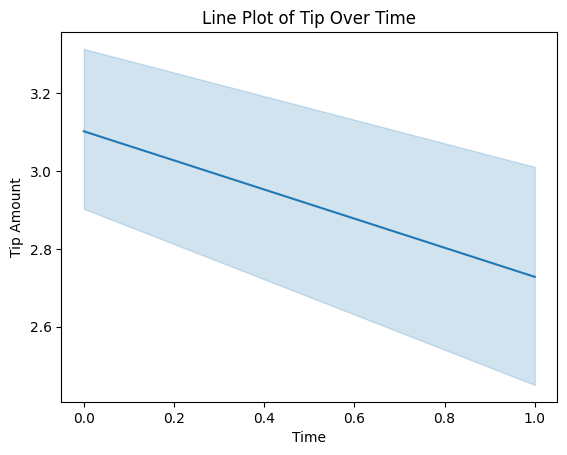

In [36]:
 
sns.lineplot(x=df['time'], y=df['tip'])
plt.title("Line Plot of Tip Over Time")
plt.xlabel("Time")
plt.ylabel("Tip Amount")
plt.show()


Trend Over Time:

Rising line: Increasing trend.
Falling line: Decreasing trend.
Flat line: Constant behavior.
Seasonality or Cycles:

Repeated peaks/valleys: Indicates seasonality or cyclic behavior.
Anomalies or Outliers:

Sudden spikes or drops: Outliers or unusual events.
Volatility or Variability:

Wavy line: High volatility or fluctuation.
Smooth line: Stable or consistent data.
Correlation with External Events:

Align data changes with external events (e.g., marketing campaigns) to see their impact.
Smoothing:

Using smoothing techniques can highlight underlying trends by reducing noise.
Turning Points:

Changes in direction (up/down): Potential significant shifts in data behavior.







Based on the observations from the above analyses, we can select the most suitable regression method.

If the scatter plots and pair plot show a linear relationship between predictors and the target (tip), then simple Linear Regression or Ridge/Lasso Regression might be suitable.
If the data shows a non-linear relationship (indicated by the Rainbow Test or residuals not being randomly scattered), then Random Forest, Decision Tree, or Support Vector Regression (SVR) would be better choices.

Best Model: Lasso Regression

MAE (0.65): Has the lowest MAE, indicating the smallest prediction error.
R² (0.51): Has the highest R², explaining 51% of the variance in the data.
Comparison with Other Models:

KNN: MAE = 0.72, R² = 0.33 (higher MAE, lower R²).
SVR: MAE = 0.68, R² = 0.38 (higher MAE, lower R²).
Random Forest: MAE = 0.76, R² = 0.26 (highest MAE, lowest R²).
Decision Tree: MAE = 0.83, R² = -0.00 (worst performance, negative R²).
Ridge Regression: MAE = 0.67, R² = 0.44 (lower R² than Lasso).
Linear Regression: MAE = 0.67, R² = 0.44 (same as Ridge, lower R² than Lasso).
Conclusion: Lasso Regression offers the best performance, balancing low error (MAE) and good explanatory power (R²)